In [1]:
# import Agros Suite
from agrossuite import agros
from agrossuite.vtk_tools import view_geometry, view_scalar

import matplotlib.pylab as pl

In [2]:
# problem
problem = agros.problem(clear = True)
problem.coordinate_type = "planar"
problem.mesh_type = "triangle"

# parameters
problem.parameters["q"] = 1000

# fields
# heat
heat = problem.field("heat")
heat.analysis_type = "steadystate"
heat.matrix_solver = "external_plugin"
heat.number_of_refinements = 1
heat.polynomial_order = 2
heat.adaptivity_type = "disabled"
heat.solver = "linear"

# boundaries
heat.add_boundary("Convection", "heat_heat_flux", {"heat_convection_external_temperature" : 293.15, "heat_convection_heat_transfer_coefficient" : 10, "heat_heat_flux" : 0, "heat_radiation_ambient_temperature" : 293.15, "heat_radiation_emissivity" : 0})
heat.add_boundary("Convection (bottom)", "heat_heat_flux", {"heat_convection_external_temperature" : 293.15, "heat_convection_heat_transfer_coefficient" : 2, "heat_heat_flux" : 0, "heat_radiation_ambient_temperature" : 293.15, "heat_radiation_emissivity" : 0})
heat.add_boundary("Source", "heat_heat_flux", {"heat_convection_external_temperature" : 0, "heat_convection_heat_transfer_coefficient" : 0, "heat_heat_flux" : "q", "heat_radiation_ambient_temperature" : 0, "heat_radiation_emissivity" : 0})

# materials
heat.add_material("Copper", {"heat_conductivity" : 385, "heat_density" : 0, "heat_specific_heat" : 0, "heat_velocity_angular" : 0, "heat_velocity_x" : 0, "heat_velocity_y" : 0, "heat_volume_heat" : 0})
heat.add_material("Aluminum", {"heat_conductivity" : 220, "heat_density" : 0, "heat_specific_heat" : 0, "heat_velocity_angular" : 0, "heat_velocity_x" : 0, "heat_velocity_y" : 0, "heat_volume_heat" : 0})

# geometry
geometry = problem.geometry()
geometry.add_edge(-0.001, 0, -0.001, 0.008, boundaries = {"heat" : "Convection"})
geometry.add_edge(-0.001, 0.008, 0.001, 0.008, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.001, 0.008, 0.001, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.001, 0, 0.004, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.004, 0.006, 0.004, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.004, 0.006, 0.006, 0.006, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.006, 0.006, 0.006, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.006, 0, 0.009, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.009, 0.005, 0.009, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.009, 0.005, 0.011, 0.005, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.011, 0.005, 0.011, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(-0.012, -0.003, -0.012, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(-0.012, 0, -0.011, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(-0.011, 0.005, -0.011, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(-0.011, 0.005, -0.009, 0.005, boundaries = {"heat" : "Convection"})
geometry.add_edge(-0.009, 0.005, -0.009, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(-0.009, 0, -0.006, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(-0.006, 0.006, -0.006, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(-0.006, 0.006, -0.004, 0.006, boundaries = {"heat" : "Convection"})
geometry.add_edge(-0.004, 0.006, -0.004, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(-0.004, 0, -0.001, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.011, 0, 0.012, 0, boundaries = {"heat" : "Convection"})
geometry.add_edge(0.012, 0, 0.012, -0.003, boundaries = {"heat" : "Convection"})
geometry.add_edge(-0.012, -0.003, -0.005, -0.003, boundaries = {"heat" : "Convection (bottom)"})
geometry.add_edge(-0.005, -0.004, -0.005, -0.003, boundaries = {"heat" : "Convection (bottom)"})
geometry.add_edge(-0.005, -0.004, 0.005, -0.004, boundaries = {"heat" : "Source"})
geometry.add_edge(0.005, -0.003, 0.005, -0.004, boundaries = {"heat" : "Convection (bottom)"})
geometry.add_edge(0.005, -0.003, 0.012, -0.003, boundaries = {"heat" : "Convection (bottom)"})
geometry.add_edge(-0.005, -0.003, 0.005, -0.003)

geometry.add_label(0, 0, materials = {"heat" : "Aluminum"})
geometry.add_label(0, -0.0035, materials = {"heat" : "Copper"})

# recipes 
heat.add_recipe_local_value("Tc", "heat_temperature_degrees", "scalar", 0, 0.008, -1, -1)

In [3]:
# studies
study_nlopt = problem.add_study("nlopt")
study_nlopt.add_parameter("q", 100, 10000)
study_nlopt.add_functional("OF", "abs(Tc-70)", 100)
study_nlopt.clear_solution = True
study_nlopt.solve_problem = True
study_nlopt.settings["xtol_rel"] = 1e-04
study_nlopt.settings["xtol_abs"] = 1e-08
study_nlopt.settings["ftol_rel"] = 1e-04
study_nlopt.settings["ftol_abs"] = 1e-08
study_nlopt.settings["n_iterations"] = 100
study_nlopt.settings["algorithm"] = "ln_bobyqa"

# computation
study_nlopt.solve()

Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - MUMPS (none)
Solver: Elapsed time: 00:00.027 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - MUMPS (none)
Solver: Elapsed time: 00:00.022 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - MUMPS (none)
Solver: Elapsed time: 00:00.022 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - MUMPS (none)
Solver: Elapsed time: 00:00.034 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from memory
Solver: Solver - MUMPS (none)
Solver: Elapsed time: 00:00.022 s
Mesh Generator: Initial mesh generation
Mesh generator: Triangle
Mesh Generator: Reading initial mesh from mem

In [6]:
of = study_nlopt.values("q")

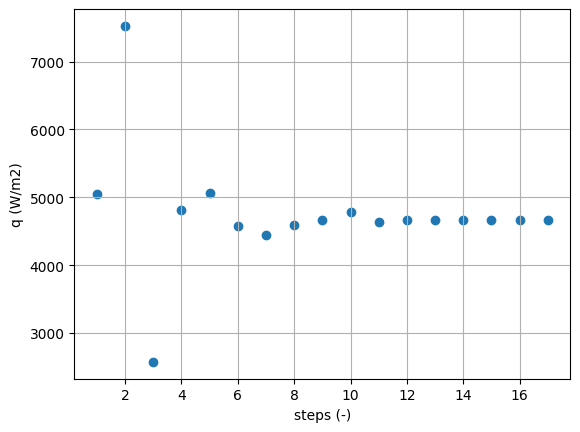

In [7]:
n = pl.linspace(1, len(of), len(of))

pl.scatter(n, of)
pl.xlabel("steps (-)")
pl.ylabel("q (W/m2)")
pl.grid(True)